# Hill Climbing Algorithem

## librarires


In [ ]:
import numpy as np
from copy import deepcopy
from copy import copy
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
import random
import matplotlib.pyplot as plt

%matplotlib inline

## Colab Setting

### Mount Drive on Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pre_prosseing With DATA

### Load Data

In [ ]:
with open('/content/drive/MyDrive/Colab Notebooks/AI Class Project 1/dj38.tsp') as f:
    file = f.read().split("\n")
    #print(file)
    index=[]
    x=[]
    y = []
    for i in file:
        a , b, c = i.split()
        index.append(int(a)-1) # in here I change city numbers from 1 to m into 0 to m-1 to be same as list index
        x.append(float(b))
        y.append(float(c))
print(index)
print(x)
print(y)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]
[11003.6111, 11108.6111, 11133.3333, 11155.8333, 11183.3333, 11297.5, 11310.2778, 11416.6667, 11423.8889, 11438.3333, 11461.1111, 11485.5556, 11503.0556, 11511.3889, 11522.2222, 11569.4444, 11583.3333, 11595.0, 11600.0, 11690.5556, 11715.8333, 11751.1111, 11770.2778, 11785.2778, 11822.7778, 11846.9444, 11963.0556, 11973.0556, 12058.3333, 12149.4444, 12286.9444, 12300.0, 12355.8333, 12363.3333, 12372.7778, 12386.6667, 12421.6667, 12645.0]
[42102.5, 42373.8889, 42885.8333, 42712.5, 42933.3333, 42853.3333, 42929.4444, 42983.3333, 43000.2778, 42057.2222, 43252.7778, 43187.2222, 42855.2778, 42106.3889, 42841.9444, 43136.6667, 43150.0, 43148.0556, 43150.0, 42686.6667, 41836.1111, 42814.4444, 42651.9444, 42884.4444, 42673.6111, 42660.5556, 43290.5556, 43026.1111, 42195.5556, 42477.5, 43355.5556, 42433.3333, 43156.3889, 43189.1667, 42711.3889, 43334.722

### Display data

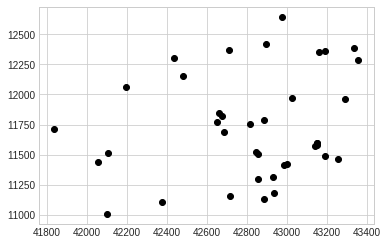

In [ ]:
plt.style.use('seaborn-whitegrid')

plt.plot(y, x, 'o', color='black');

## Defind Functions

### Computing distanatce between two cities (Function):

In [ ]:
def distance(x1,y1 ,x2,y2):
  dis = np.sqrt(np.square(x1-x2) + np.square(y1-y2))
  return dis

print(f"first ({x[0]},{y[0]}) and second ({x[1]},{y[1]})")
distance(x[0],y[0], x[1],y[1])

first (11003.6111,42102.5) and second (11108.6111,42373.8889)


290.99301545433866

### Make matrix of distance:

In [ ]:
def tsp_matrix(x,y):
  tsp = []
  row = []
  for i in range(len(x)):
    row.clear()
    for j in range(len(x)):
      row.append(distance(x[i],y[i] ,x[j],y[j]))
    r = copy(row)
    tsp.append(r)
  return tsp

In [ ]:
#test

print(tsp_matrix(x,y))

[[0.0, 290.99301545433866, 794.0018312710164, 628.7062892741252, 850.0494347752532, 806.3010169484456, 881.9759098638978, 972.873183452112, 991.2811948915838, 437.07375847296123, 1237.9197337359349, 1186.9678817276742, 903.3931728506114, 507.7926916725464, 903.1807647058093, 1178.8418412907574, 1197.2193112261596, 1201.2191072966534, 1205.3779366004712, 901.7446864102617, 760.410092131903, 1032.2892417783694, 943.2215951621602, 1105.6400293858078, 998.6000054737141, 1011.2552138704898, 1527.0919609740627, 1338.9847283010597, 1058.8192781887758, 1205.6363263392866, 1793.625572849654, 1337.936789400792, 1714.40563803204, 1740.6001775427158, 1498.45358451041, 1852.3537304910717, 1624.7519408767353, 1858.0926127166258], [290.99301545433866, 0.0, 512.5409796925513, 341.88801268259067, 564.4124767084799, 515.311506988317, 591.0256944238062, 682.8768039571414, 701.258258572444, 457.1591933470562, 946.943476952674, 896.4363964995716, 622.3517788385158, 483.5144322280772, 624.6199589538123, 891

### Make random sluoition

In [ ]:
def random_solution(tsp):
  cities = list(range(len(tsp)))
  solution = []

  for i in range(len(tsp)):
    random_city = cities[random.randint(0,len(cities)-1)]
    solution.append(random_city)
    cities.remove(random_city)

  return solution

In [ ]:
# test of function
tsp = tsp_matrix(x,y)
print(random_solution(tsp), len(random_solution(tsp)))

[34, 24, 4, 1, 32, 13, 18, 30, 37, 3, 11, 27, 28, 9, 5, 17, 8, 26, 31, 22, 35, 21, 0, 29, 7, 19, 33, 23, 2, 14, 36, 16, 20, 10, 12, 6, 25, 15] 38


### Find routelength of soluotion

In [ ]:
def route_length(tsp, solution):
  """
  Funciton input is tsp and solution which tsp is matrix of distance between cites and solution is list of cites

  The output is length of solution from firt city to the goal (cost)
  """
  length = 0
  for i in range(len(solution)):
    length += tsp[solution[i-1]][solution[i]]
  return length

In [ ]:
# test
tsp = tsp_matrix(x,y)
rands = random_solution(tsp)
print(route_length(tsp,rands))


28524.668671051088


### Find neighbors of a solution


In [ ]:
def find_neighbors(solution):
  neighbors = []
  for i in range(len(solution)): #This for loop will make new list from solution by changing element positions
    for j in range(i+1,len(solution)):
      a = solution.copy()
      a[i] = solution[j]
      a[j] = solution[i]
      neighbors.append(a)
  return neighbors

In [ ]:
# test
solution = random_solution(tsp)
print(find_neighbors(solution))

[[36, 7, 34, 20, 15, 8, 6, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [34, 36, 7, 20, 15, 8, 6, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [20, 36, 34, 7, 15, 8, 6, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [15, 36, 34, 20, 7, 8, 6, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [8, 36, 34, 20, 15, 7, 6, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [6, 36, 34, 20, 15, 8, 7, 35, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14], [35, 36, 34, 20, 15, 8, 6, 7, 9, 29, 24, 11, 5, 37, 0, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19,

### Find best neighbor

In [ ]:
def find_best_neighbor(tsp , neighbors):
  best_neighbor_length = route_length(tsp, neighbors[0]) # Initial answer
  best_neighbor = neighbors[0]

  for i in neighbors:
    current_length = route_length(tsp , i)
    if current_length < best_neighbor_length :
      best_neighbor_length = current_length
      best_neighbor = i
  
  return best_neighbor, best_neighbor_length

### Plot Cost

In [ ]:
def plot_cost(cost_value):
  iteration = []
  for i in range(1,len(cost_value)+1):
    iteration.append(i)
    
  plt.plot(iteration, cost_value, '-o', color='blue');

### Hill Climbing Function

In [ ]:
def hill_climbing(tsp):
  
  cost_value = []

  current_solution = random_solution(tsp) # This line of code will give us a random road to all cities

  current_route_length = route_length(tsp,current_solution) # This our cost value for current route

  print(f"Current solution is {current_solution} with cost of: {current_route_length}")

  neighbors = find_neighbors(solution)

  best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  while best_neighbor_length < current_route_length :
    current_solution = best_neighbor
    print(f"Current solution is {current_solution} with cost of: {current_route_length}")
    current_route_length = best_neighbor_length

    cost_value.append(current_route_length)

    neighbors = find_neighbors(current_solution)
    best_neighbor , best_neighbor_length = find_best_neighbor(tsp , neighbors)

  return current_solution , current_route_length, cost_value

## Main program

Current solution is [27, 37, 12, 25, 13, 11, 7, 34, 4, 20, 19, 0, 2, 31, 26, 16, 24, 3, 23, 10, 32, 28, 15, 18, 1, 21, 35, 17, 9, 6, 29, 22, 30, 36, 5, 33, 14, 8] with cost of: 29980.34369784497
Current solution is [7, 36, 34, 20, 15, 8, 6, 0, 9, 29, 24, 11, 5, 37, 35, 32, 2, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 30, 25, 27, 12, 18, 31, 19, 1, 14] with cost of: 29980.34369784497
Current solution is [7, 36, 34, 20, 15, 8, 6, 0, 9, 29, 24, 11, 5, 37, 35, 32, 30, 26, 10, 17, 3, 21, 28, 33, 13, 22, 23, 16, 4, 2, 25, 27, 12, 18, 31, 19, 1, 14] with cost of: 24566.92700878591
Current solution is [7, 36, 34, 33, 15, 8, 6, 0, 9, 29, 24, 11, 5, 37, 35, 32, 30, 26, 10, 17, 3, 21, 28, 20, 13, 22, 23, 16, 4, 2, 25, 27, 12, 18, 31, 19, 1, 14] with cost of: 21745.8661813856
Current solution is [7, 36, 34, 33, 15, 8, 6, 0, 9, 29, 24, 11, 5, 37, 35, 32, 30, 26, 10, 17, 3, 31, 28, 20, 13, 22, 23, 16, 4, 2, 25, 27, 12, 18, 21, 19, 1, 14] with cost of: 19034.461905469176
Current solution is [7, 3

Text(0, 0.5, 'Cost')

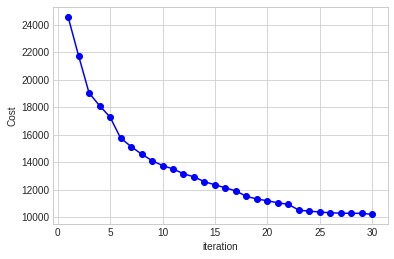

In [ ]:
tsp = tsp_matrix(x,y) # This line will give us m*m matrix of distance between cites. m is total number of cities

Best_solution, best_cost , cost_value= hill_climbing(tsp) # This line of code will find best solution with hill_climbing algorithm

print("\n"+ f"Best solution is {Best_solution} and best cost is {best_cost}")

plot_cost(cost_value)
plt.xlabel("iteration")
plt.ylabel("Cost")